In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving women50.png to women50.png
Found 80 images belonging to 3 classes.


1/1 [==============================] - 0s 95ms/step


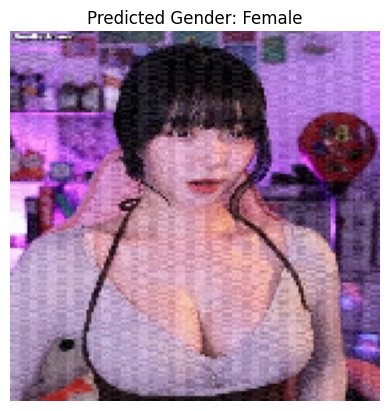

Predicted gender: Female with 90.68% confidence


In [ ]:
from keras.preprocessing import image as keras_image
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 데이터 경로
train_data_dir = '/content/drive/MyDrive/dataset/train'  # 훈련 데이터 경로
uploaded = files.upload()
img_width, img_height = 150, 150  # 이미지 크기

# CNN 모델 생성
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 이미지 데이터 생성기 설정
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터 불러오기
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=32, class_mode='binary')

# 이미지 예측 및 재훈련
for file_name in uploaded.keys():
    # 업로드된 이미지를 모델에서 사용할 수 있는 형식으로 변환
    img_path = '/content/' + file_name
    img = keras_image.load_img(img_path, target_size=(img_width, img_height))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # 이미지 정규화

    # 성별 예측
    prediction = model.predict(img_array)
    predicted_class = "Male" if prediction < 0.5 else "Female"  # 0.5를 기준으로 이진 분류

    # 예측 결과 및 이미지 출력
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Gender: {predicted_class}")
    plt.show()

    # 예측 확률로 출력
    confidence = prediction[0][0] if prediction < 0.5 else 1 - prediction[0][0]
    confidence_percentage = confidence * 100 * 2
    print(f'Predicted gender: {predicted_class} with {confidence_percentage:.2f}% confidence')

    # 사용자 입력을 받아 예측이 맞는지 확인
    user_response = input("Is the prediction correct? (yes/no): ")

    if user_response.lower() == 'no':
        # 잘못된 예측일 경우, 재훈련
        label = int(input("Enter correct label (0 for Male, 1 for Female): "))
        train_generator.filenames.append(file_name)
        train_generator.classes = np.append(train_generator.classes, label)
        model.fit(train_generator, epochs=1)
        print("Model retrained with new data.")
    else:
        print("Prediction accepted.")
